Config LLM model

In [ ]:
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


Config Embedding model

In [5]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

Load Data -> Embed -> Store to VectorDB

In [6]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [10]:
loader=DirectoryLoader("./data",glob="./*.txt",loader_cls=TextLoader)

In [11]:
docs = loader.load()

In [12]:
len(docs)

1

In [13]:
docs

[Document(metadata={'source': 'data\\speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\n…\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairn

In [14]:
docs[0]

Document(metadata={'source': 'data\\speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\n…\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairne

In [15]:
docs[0].page_content

'The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\n…\n\nIt will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairness because we act without animus, not in enmity toward a people

In [16]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [17]:
new_docs=text_splitter.split_documents(documents=docs)

In [18]:
len(new_docs)

27

In [19]:
new_docs

[Document(metadata={'source': 'data\\speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind.'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel

In [20]:
doc_string=[doc.page_content for doc in new_docs]

In [21]:
doc_string

['The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no',
 'We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind.',
 'one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.',
 'Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our',
 'peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be',
 'of right and of fair play we p

In [22]:
len(doc_string)

27

In [23]:
db=Chroma.from_documents(new_docs,embeddings)

In [25]:
retriever=db.as_retriever(search_kwargs={"k": 3})

In [39]:
retriever.invoke("industrial growth of usa?")

[Document(metadata={'source': 'data\\speech.txt'}, page_content='the day has come when America is privileged to spend her blood and her might for the principles that gave her birth and happiness and the peace which she has treasured. God helping her, she can do no'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no'),
 Document(metadata={'source': 'data\\speech.txt'}, page_content='…')]

Importing Libraries

In [107]:
import operator

from typing import List, TypedDict, Annotated, Sequence

from pydantic import BaseModel , Field

from langchain.prompts import PromptTemplate
from langchain.output_parsers import PydanticOutputParser
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough

from langgraph.graph import StateGraph, END


Pydantic Class for LLM Output

In [58]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [59]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [60]:
print (parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


Understand Graph State

In [61]:
Agentstate={}

In [62]:
Agentstate["messages"] = []

In [63]:
Agentstate

{'messages': []}

In [64]:
Agentstate["messages"].append("Hi, How are you ?")

In [65]:
Agentstate["messages"].append("I am doing fine. How do you do ?")

In [66]:
Agentstate

{'messages': ['Hi, How are you ?', 'I am doing fine. How do you do ?']}

In [67]:
Agentstate["messages"][-1]

'I am doing fine. How do you do ?'

In [68]:
Agentstate["messages"][0]

'Hi, How are you ?'

Graph State as Custom Class

In [69]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[HumanMessage], operator.add]

In [70]:
state={"messages":["hi"]}

In [71]:
state

{'messages': ['hi']}

Logic for Graph Nodes / Functions

In [97]:
# Decide whether need to use VectorDatabase or LLM generate

def function_1(state:AgentState):
    
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [USA,Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Topic]}

In [98]:
state={"messages":["what is a today weather?"]}

function_1(state)

Question what is a today weather?
Parsed response: Topic='Not Related' Reasoning='The query asks for the weather, which is not specific to the USA.'


{'messages': ['Not Related']}

In [99]:
state={"messages":["what is USA GDP as of 2025?"]}

function_1(state)

Question what is USA GDP as of 2025?
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'


{'messages': ['USA']}

In [100]:
state={"messages":["Who is Donald Trump?"]}

function_1(state)

Question Who is Donald Trump?
Parsed response: Topic='USA' Reasoning='Donald Trump is a prominent figure in US politics.'


{'messages': ['USA']}

In [101]:
def router(state:AgentState):
    print("--------------- ROUTER ---------------")
    last_message=state["messages"][-1]
    print("last_message:", last_message)
    print ("-------------------------------------")
    
    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [102]:
router({'messages': ['USA']})

--------------- ROUTER ---------------
last_message: USA
-------------------------------------


'RAG Call'

In [103]:
router({'messages': ['Not Related']})

--------------- ROUTER ---------------
last_message: Not Related
-------------------------------------


'LLM Call'

In [104]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [105]:
print (format_docs(new_docs[:3]))

The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no

We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind.

one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.


In [106]:
# RAG Function

def function_2(state:AgentState):
    print("--------------- RAG ---------------")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [110]:
# LLM Function

def function_3(state:AgentState):
    print("--------------- LLM ---------------")

    question = state["messages"][0]
    
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

Let's build the Graph

In [111]:
workflow = StateGraph(AgentState)

In [112]:
workflow.add_node("Supervisor", function_1)
workflow.add_node("RAG", function_2)
workflow.add_node("LLM", function_3)

In [113]:
workflow.set_entry_point("Supervisor")

workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

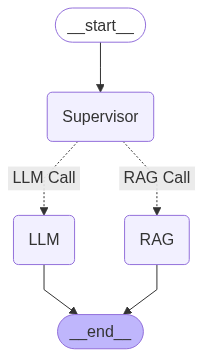

In [114]:
workflow.compile()

In [115]:
app=workflow.compile()

Let's Test the Graph(app)

In [116]:
# 1. General Question

state={"messages":["hi"]}

In [117]:
app.invoke(state)

Question hi
Parsed response: Topic='Not Related' Reasoning="The query 'hi' is a generic greeting and does not relate to the USA."
--------------- ROUTER ---------------
last_message: Not Related
-------------------------------------
--------------- LLM ---------------


{'messages': ['hi', 'Not Related', 'Hi there!']}

In [118]:
# 2. USA related Question

state={"messages":["can you tell me the industrial growth of world's most powerful economy?"]}

In [119]:
app.invoke(state)

Question can you tell me the industrial growth of world's most powerful economy?
Parsed response: Topic='USA' Reasoning="The query asks about the industrial growth of the world's most powerful economy, which is generally considered to be the USA."
--------------- ROUTER ---------------
last_message: USA
-------------------------------------
--------------- RAG ---------------


{'messages': ["can you tell me the industrial growth of world's most powerful economy?",
  'USA',
  'This question cannot be answered from the given context.  The provided text is a political speech, not economic data.']}

In [122]:
# 3. Tricky Question

state={"messages":["can you tell me the industrial growth of world's most poor economy?"]}

In [123]:
app.invoke(state)

Question can you tell me the industrial growth of world's most poor economy?
Parsed response: Topic='Not Related' Reasoning="The query asks about the industrial growth of the world's poorest economy, which is a global issue not specific to the USA."
--------------- ROUTER ---------------
last_message: Not Related
-------------------------------------
--------------- LLM ---------------


{'messages': ["can you tell me the industrial growth of world's most poor economy?",
  'Not Related',
  'There\'s no single definitive answer to "the industrial growth of the world\'s most poor economy" because:\n\n1. **Defining "most poor" is complex:**  Poverty is measured in various ways (GDP per capita, poverty rates, Gini coefficient, etc.), and different metrics will yield different "poorest" countries.  Rankings also fluctuate.\n\n2. **Data availability is inconsistent:** Reliable, consistent industrial growth data isn\'t available for all countries, especially the poorest.  Many lack robust statistical systems.\n\n3. **"Industrial growth" is broad:**  This could refer to manufacturing output, the overall industrial sector (including mining, utilities), or even broader economic activity related to industry.  The meaning significantly impacts the answer.\n\n4. **Growth is uneven:**  Even within a single country, industrial growth can be highly concentrated in specific regions or 

Let's analyze the Response(result)

In [129]:
result = app.invoke(state)

Question can you tell me the industrial growth of world's most poor economy?
Parsed response: Topic='Not Related' Reasoning="The query asks about the industrial growth of the world's poorest economy, which is a global economic topic not specific to the USA."
--------------- ROUTER ---------------
last_message: Not Related
-------------------------------------
--------------- LLM ---------------


In [130]:
print (result["messages"][-1])

There's no single, universally agreed-upon measure of "world's most poor economy," as different metrics (GDP per capita, poverty rates, Human Development Index, etc.) yield different results.  Further complicating matters is the difficulty in accurately collecting economic data in many of the world's poorest countries.

However, generally speaking, the industrial growth in the economies often considered among the poorest is characterized by:

* **Low levels of industrialization:**  These economies tend to be heavily reliant on agriculture and subsistence farming, with limited industrial sectors.  Manufacturing is often small-scale, informal, and lacks advanced technology.

* **Slow and uneven growth:**  Industrial growth, when it occurs, is often slow, uneven, and vulnerable to external shocks (e.g., commodity price fluctuations, climate change).

* **Limited diversification:** Industrial output is frequently concentrated in a few sectors, making these economies susceptible to downturn